In [38]:
import os
from google.cloud import storage
from matplotlib import pyplot as plt
import numpy as np
import sys

In [39]:
def get_item_data(item, N, seed, program, env):
    lst = list()
    if not os.path.isdir(f"./output/{env}"):
        os.system(f"mkdir ./output/{env}")
    if not os.path.isdir(f"./output/{env}/{program}"):
        os.system(f"mkdir ./output/{env}/{program}")
    for n in range(N):
        if not os.path.isdir(f"./outut/{env}/{program}/{seed + n}"):
            os.system(f"mkdir ./output/{env}/{program}/{seed + n}")
        bucket = storage.Client().bucket('kiran-research')
        blob = bucket.blob(f"latent-actions/outputs/{program}/seed{seed + n}/{env}/{item}.npy")
        blob.download_to_filename(f"./output/{env}/{program}/{seed + n}/{item}.npy")
        lst.append(np.load(f"./output/{env}/{program}/{seed + n}/{item}.npy"))
    print(f"from {program}/{env}: {[l.size for l in lst]}")
    length = min([len(l) for l in lst])
    print(f"num timesteps in array: {length}")
    arr = np.concatenate([l[np.newaxis, :length] for l in lst], axis=0)
    return arr

from bcq/halfcheetah-random-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/halfcheetah-medium-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/halfcheetah-expert-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/halfcheetah-medium-replay-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/halfcheetah-medium-expert-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/walker2d-random-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/walker2d-medium-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/walker2d-expert-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/walker2d-medium-replay-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/walker2d-medium-expert-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/hopper-random-v0: [200, 200, 200, 200, 200]
num timesteps in array: 200
from bcq/hopper-medium-v0: [200, 200, 200, 200

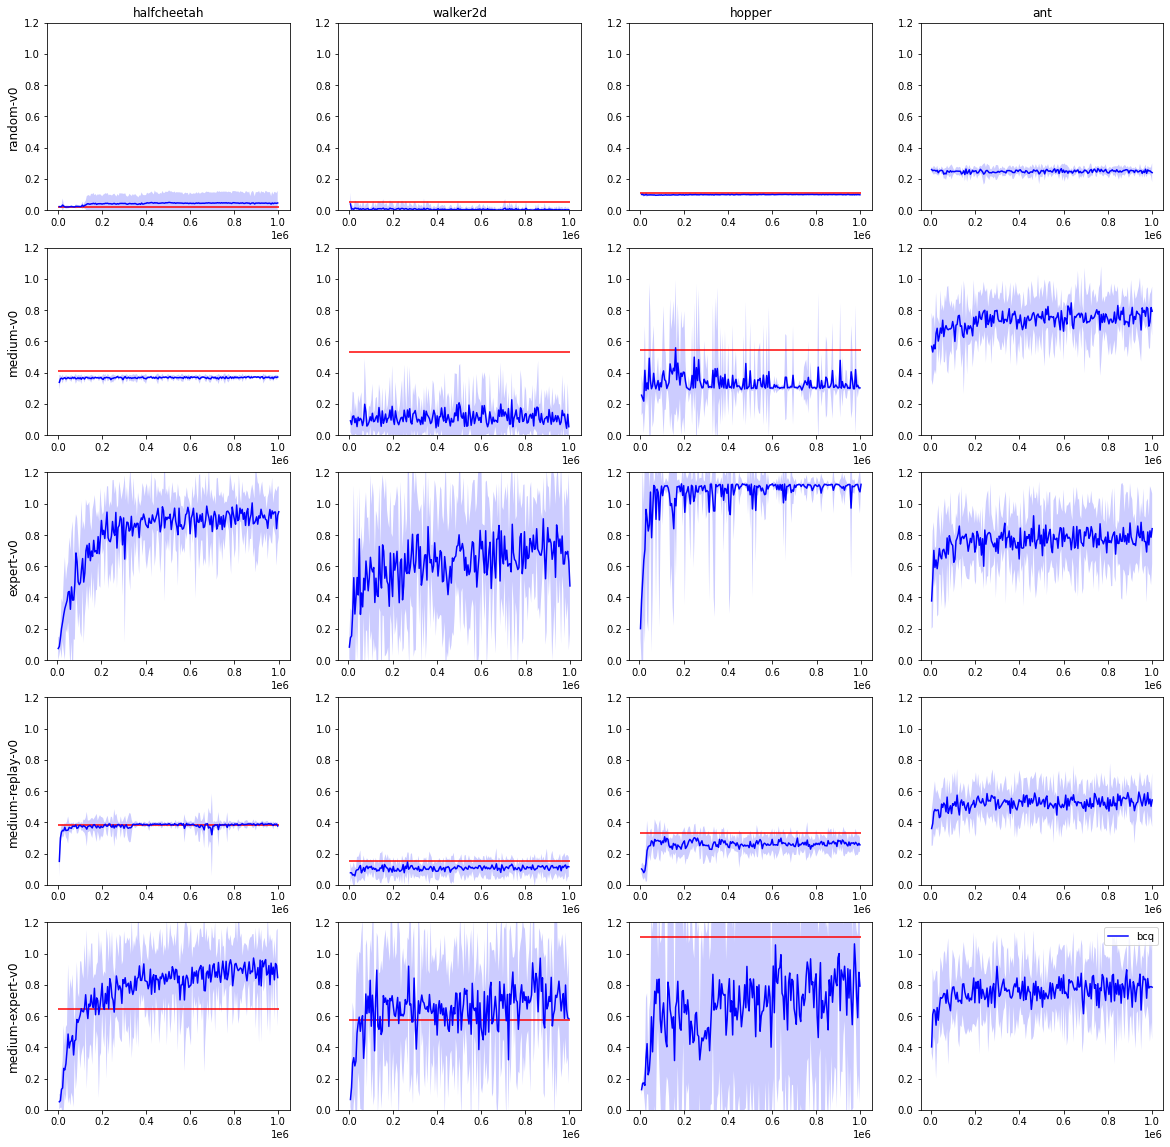

In [50]:
default_colors = ["blue"]
def show_programs_and_envs(item, 
                           programs, 
                           envs, 
                           datasets, 
                           seed, 
                           N=5, 
                           eval_freq=int(5e3), 
                           max_timesteps=int(1e6), 
                           colors=default_colors,
                           aux=None):
    fig, axes = plt.subplots(ncols=len(envs), nrows=len(datasets), figsize=(20, 20))
    for ax, col in zip(axes[0], envs):
        ax.set_title(col)
    for ax, row in zip(axes[:,0], datasets):
        ax.set_ylabel(row, size='large')
    assert len(colors) >= len(programs)
    for i, env in enumerate(envs):
        for j, dataset in enumerate(datasets):
            for k, program in enumerate(programs):
                index = i * len(datasets) + j + 1
                rewards = get_item_data(item, N, seed, program, env + "-" + dataset)
                mean = rewards.mean(0)
                std = rewards.std(0)
                x = range(eval_freq, eval_freq * (mean.shape[0] + 1), eval_freq)
                axes[j, i].set_ylim(0, 1.2)
                axes[j, i].plot(x, mean, color=colors[k], label=program)
                axes[j, i].fill_between(x, mean - 2 * std, mean + 2 * std, facecolor=colors[k], alpha=0.2)
                if aux is not None and i < 3 and j != 2:
                    axes[j, i].hlines(aux[i][j] / 100., 0, eval_freq * (mean.shape[0] + 1), colors=['red'])
    plt.legend()
    plt.show()
envs = ["halfcheetah", "walker2d", "hopper", "ant"]
datasets = ["random-v0", "medium-v0", "expert-v0", "medium-replay-v0", "medium-expert-v0"]
aux = [[2.2, 40.7, None, 38.2, 64.7], [4.9, 53.1, None, 15.0, 57.5], [10.6, 54.5, None, 33.1, 110.9]]
show_programs_and_envs("reward", ['bcq'], envs, datasets, 1980, aux=aux)

from ours/halfcheetah-random-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-random-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-random-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-random-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-random-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-medium-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-medium-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-medium-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-medium-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-medium-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-expert-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-expert-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-expert-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-expert-v0: [200]
num timesteps in array: 200
from ours/halfcheetah-expert-v0: [200]
num timesteps in array:

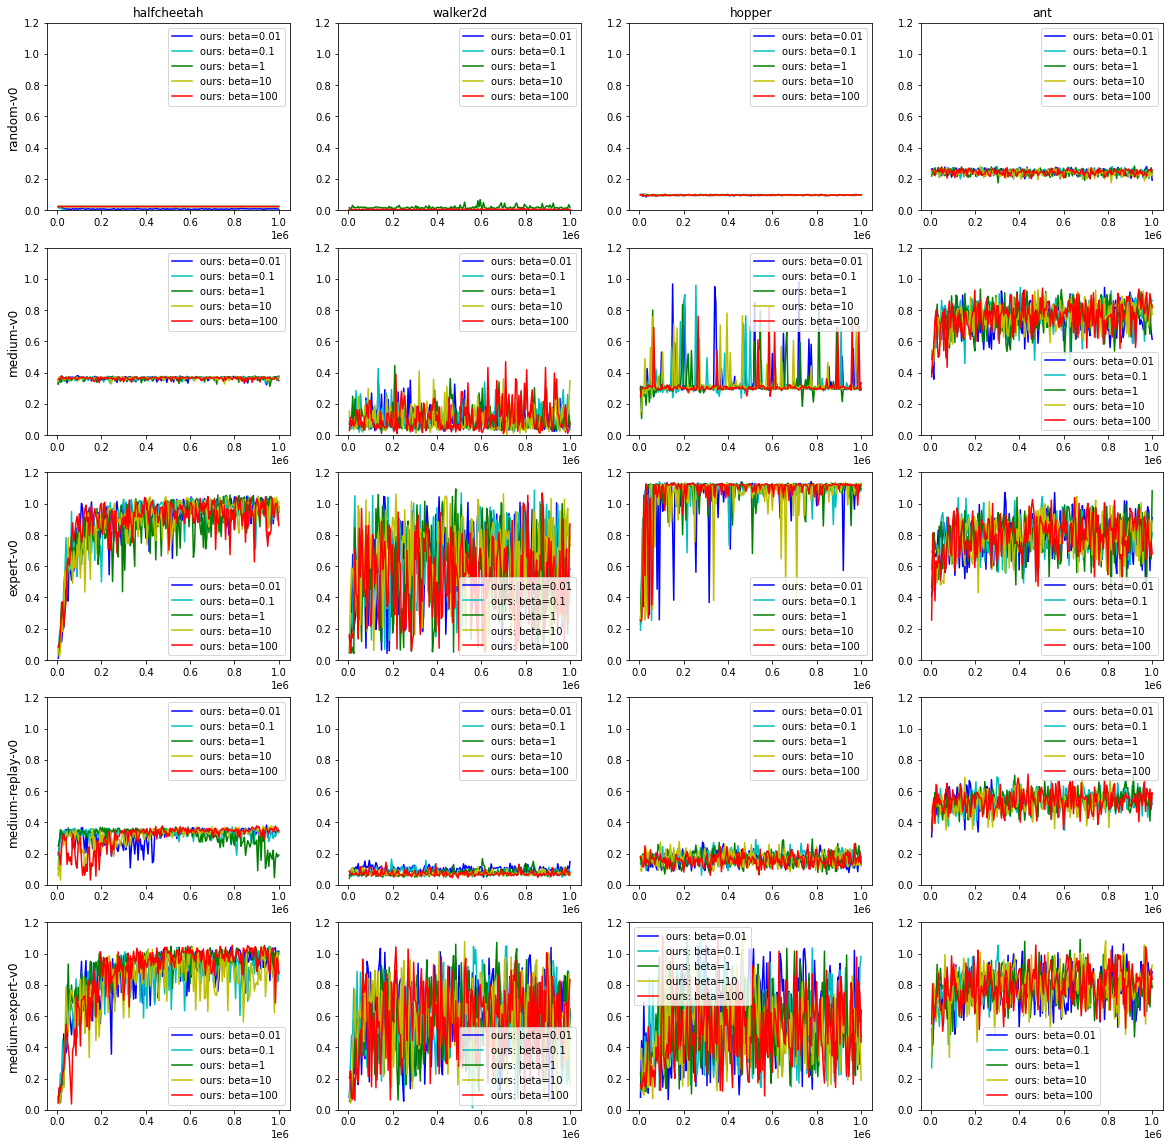

In [61]:
def show_hyperparam_sweep(item, 
                          programs,
                          envs,
                          datasets,
                          hp_mapping,
                          N=1,
                          eval_freq=int(5e3), 
                          max_timesteps=int(1e6), 
                          colors=default_colors,
                          aux=None):
    fig, axes = plt.subplots(ncols=len(envs), nrows=len(datasets), figsize=(20, 20))
    for ax, col in zip(axes[0], envs):
        ax.set_title(col)
    for ax, row in zip(axes[:,0], datasets):
        ax.set_ylabel(row, size='large')
    assert len(colors) >= len(programs)
    for i, env in enumerate(envs):
        for j, dataset in enumerate(datasets):
            for program in programs:
                for s, seed in hp_mapping[program].items():
                    index = i * len(datasets) + j + 1
                    rewards = get_item_data(item, N, seed, program, env + "-" + dataset)
                    mean = rewards.mean(0)
                    std = rewards.std(0)
                    x = range(eval_freq, eval_freq * (mean.shape[0] + 1), eval_freq)
                    axes[j, i].set_ylim(0, 1.2)
                    axes[j, i].fill_between(x, mean - std, mean + std, facecolor=colors[program][s], alpha=0.2)
                    axes[j, i].plot(x, mean, c=colors[program][s], label=program + ": " + s if s != "" else s)
                    if aux is not None and i < 3 and j != 2:
                        axes[j, i].hlines(aux[i][j] / 100., 0, eval_freq * (mean.shape[0] + 1), colors=['r'])
                    axes[j, i].legend()
    plt.show()
envs = ["halfcheetah", "walker2d", "hopper", "ant"]
datasets = ["random-v0", "medium-v0", "expert-v0", "medium-replay-v0", "medium-expert-v0"]
hp_mapping = {'ours': {'beta=0.01': 1980, 'beta=0.1': 1981, 'beta=1': 1982, 'beta=10': 1983, 'beta=100':1984}}
colors = {'ours': {'beta=0.01': 'b', 'beta=0.1': 'c', 'beta=1': 'g', 'beta=10': 'y', 'beta=100': 'r'}}
show_hyperparam_sweep("reward", ['ours'], envs, datasets, hp_mapping, colors=colors)